In [109]:
import numpy as np
import scipy.stats
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot

from matplotlib import animation, rc
from IPython.display import HTML
import random

jtplot.style()

plt.rcParams['figure.figsize'] = [10, 10]

In [118]:
class DirichletMultinomial:
    def __init__(self, thetas, alphas):
        self.thetas = thetas
        self.alphas = alphas
    
    def likelihood(self, data):
        return np.prod(np.power(self.thetas, self.data_counts(data)))
    
    def likelihood2(self, data):
        return scipy.stats.multinomial.pmf(self.data_counts(data), n=len(data), p=self.thetas)
    
    def prior(self):
        return scipy.stats.dirichlet.pdf(self.thetas, self.alphas)

    def posterior(self, data):
        return scipy.stats.dirichlet.pdf(self.thetas, np.array(self.alphas) + np.array(self.data_counts(data)))
    
    def posterior_prediction(self, data):
        data_counts = self.data_counts(data)
        return (np.array(self.alphas) + np.array(data_counts)) / (np.sum(data_counts) + np.sum(self.alphas))
                                                
    def data_counts(self, data):
        return [data.count(k) for k in range(len(self.thetas))]


In [119]:
model = DirichletMultinomial(thetas=[0.5, 0.5], alphas=[1, 1])
data = [0, 1, 0, 0, 0]
print(model.likelihood(data))
print(model.likelihood2(data))
print(model.prior())
print(model.posterior(data))
print(model.posterior_prediction(data))

0.03125
0.15624999999999994
1.0
0.9375000000000001
[0.71428571 0.28571429]


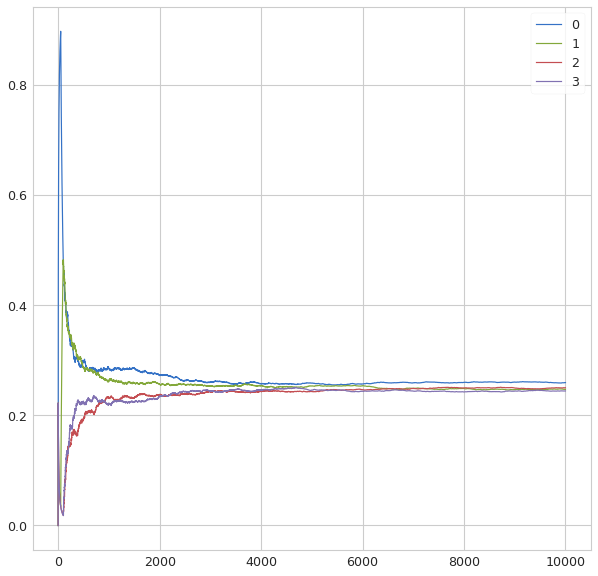

In [124]:
p = 50
p1 = [0] * p
p2 = [1] * p


data = p1 + p2 + np.random.randint(4, size=9900).tolist()
model = DirichletMultinomial(thetas=[1/4] * 4, alphas=[2] * 4)
results = np.zeros(shape=(10000, 4))

for i in range(1, len(data)):
    results[i, :] = model.posterior_prediction(data[:i])

plt.plot(np.arange(len(data)), results[:, 0], label="0")
plt.plot(np.arange(len(data)), results[:, 1], label="1")
plt.plot(np.arange(len(data)), results[:, 2], label="2")
plt.plot(np.arange(len(data)), results[:, 3], label="3")
plt.legend()
plt.show()

[1, 7, 3, 18]

In [128]:
from collections import Counter
import spacy
nlp = spacy.load('en')

with open('californication.txt', 'r') as text:
    wordcount = Counter(text.read().split())
    doc = nlp(u"Apples and oranges are similar. Boots and hippos aren't.")

for token in doc:
    print(token, token.lemma, token.lemma_)
    print(wordcount)

ImportError: No module named 'spacy'

In [127]:
with open('poem.txt', 'r') as text:
    wordcount = Counter(text.read().split())
    doc = nlp(u"Apples and oranges are similar. Boots and hippos aren't.")

for token in doc:
    print(token, token.lemma, token.lemma_)
    print(wordcount)

NameError: name 'nlp' is not defined